In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [400]:
train = pd.read_csv('data/train.csv')

In [401]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [402]:
round(train.isna().sum() / len(train),4) * 100

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

In [403]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [404]:
# sns.pairplot(train, hue='Transported')

In [405]:
[(i, train[i].nunique()) for i in train.columns]

[('PassengerId', 8693),
 ('HomePlanet', 3),
 ('CryoSleep', 2),
 ('Cabin', 6560),
 ('Destination', 3),
 ('Age', 80),
 ('VIP', 2),
 ('RoomService', 1273),
 ('FoodCourt', 1507),
 ('ShoppingMall', 1115),
 ('Spa', 1327),
 ('VRDeck', 1306),
 ('Name', 8473),
 ('Transported', 2)]

In [406]:
train.ShoppingMall.value_counts()

ShoppingMall
0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: count, Length: 1115, dtype: int64

<Axes: ylabel='Frequency'>

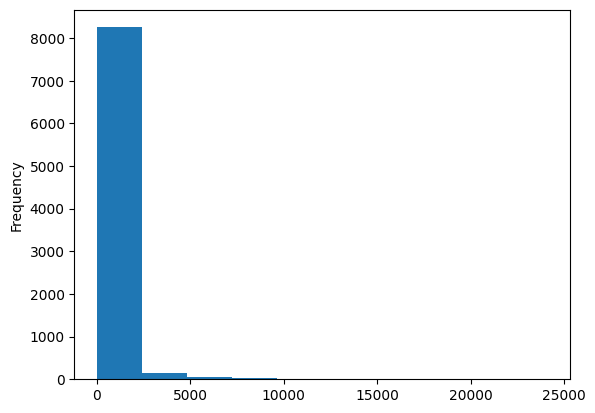

In [407]:
train.VRDeck.plot(kind='hist')

In [408]:
train.Spa.sort_values(ascending=False)

5722    22408.0
7995    18572.0
1390    16594.0
1095    16139.0
6921    15586.0
         ...   
8554        NaN
8566        NaN
8569        NaN
8623        NaN
8643        NaN
Name: Spa, Length: 8693, dtype: float64

In [409]:
X_train = train.drop('Transported', axis=1)
y_train = train.Transported

In [410]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [411]:
train.tail(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [412]:
train.groupby(train.PassengerId.str.split('_').str[0]).transform(len)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8689,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8690,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8691,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [413]:
class modifyColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()

        id_split = X_new.PassengerId.str.split('_').str
        cabin_split = X_new.Cabin.str.split('/').str

        X_new['Id_0'] = id_split[0]
        X_new['Id_1'] = id_split[1]

        X_new['CabinFirst'] = cabin_split[0]
        X_new['CabinMiddle'] = cabin_split[1].astype('float64')
        X_new['CabinLast'] = cabin_split[2]

        X_new['TotalSpend'] = X_new[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
        X_new['IsSpend'] = X_new['TotalSpend'].apply(lambda x: True if x > 0 else False)

        X_new['AgeCat'] = pd.cut(X_new.Age, bins=3, labels=['Young', 'Adult', 'Old'])

        X_new['TotalPartner'] = X_new.groupby('Id_0').transform(len).CabinLast.astype('float64')
        X_new['Alone'] = X_new.TotalPartner.apply(lambda x: True if x == 1 else False)

        X_new.drop(['PassengerId', 'Name', 'Cabin', 'Id_0'], axis=1, inplace=True)
        
        for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
            # X_new[i] = np.log(X_new[i] + 1)
            X_new[i] = X_new[i].apply(lambda x: 5000 if x > 5000 else x)

        return X_new

In [414]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [415]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [416]:
X_train_modify = modifyColumns().transform(X_train)

In [417]:
numerical_cols = [i for i in X_train_modify if X_train_modify[i].dtype == 'float64']
categorical_cols = [i for i in X_train_modify if X_train_modify[i].dtype != 'float64']

In [418]:
numerical_cols, categorical_cols

(['Age',
  'RoomService',
  'FoodCourt',
  'ShoppingMall',
  'Spa',
  'VRDeck',
  'CabinMiddle',
  'TotalSpend',
  'TotalPartner'],
 ['HomePlanet',
  'CryoSleep',
  'Destination',
  'VIP',
  'Id_1',
  'CabinFirst',
  'CabinLast',
  'IsSpend',
  'AgeCat',
  'Alone'])

In [419]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [420]:
pipeline = Pipeline([
    ('modifyColumns', modifyColumns()),
    ('preprocessor', preprocessor),
    ('clf', SVC())
])

In [421]:
# np.log(X_train_modify.Age + 1).plot(kind='hist')

In [422]:
X_train_modify

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Id_1,CabinFirst,CabinMiddle,CabinLast,TotalSpend,IsSpend,AgeCat,TotalPartner,Alone
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,01,B,0.0,P,0.0,False,Adult,1.0,True
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,01,F,0.0,S,736.0,True,Young,1.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,5000.0,49.0,01,A,0.0,S,10383.0,True,Old,2.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,02,A,0.0,S,5176.0,True,Adult,2.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,01,F,1.0,S,1091.0,True,Young,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,5000.0,0.0,1643.0,74.0,01,A,98.0,P,8536.0,True,Adult,1.0,True
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,01,G,1499.0,S,0.0,False,Young,1.0,True
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,01,G,1500.0,S,1873.0,True,Young,1.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,01,E,608.0,S,4637.0,True,Adult,2.0,False


In [423]:
param_grid = {'clf': [CatBoostClassifier(verbose=False), SVC(), RandomForestClassifier()]}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'clf': SVC()}
Best cross-validation score:  0.7951256988693024


In [424]:
test = pd.read_csv('data/test.csv')

In [425]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [426]:
best_model = grid_search.best_estimator_

y_test = best_model.predict(test)

print("Predictions: ", y_test)

Predictions:  [ True False  True ...  True  True  True]


In [427]:
result = pd.DataFrame(y_test, columns=['Transported'])

In [428]:
test.join(result)[['PassengerId', 'Transported']].to_csv('submission.csv', index=False)